## 1. Introduction - House Prices Dataset

<div style="width:100%;text-align: center;"><img align=middle src= "https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/home-improvement/wp-content/uploads/2022/07/download-23.jpg" alt ="Beautiful House" style='width: 750px;'></div>


The dataset for this competition (both train and test) was generated from a deep learning model trained on the California Housing Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance. Our objective is to figure out the price of a house based on given independent variables.

**Files**

* train.csv - the training dataset; MedHouseVal is the target
* test.csv - the test dataset; your objective is to predict MedHouseVal
* sample_submission.csv - a sample submission file in the correct format

## 2. Import Libraries

Basic libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e1/sample_submission.csv
/kaggle/input/playground-series-s3e1/train.csv
/kaggle/input/playground-series-s3e1/test.csv


## 3. Import Dataset

In [117]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e1/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e1/test.csv')

## 4. Explore the Dataset

In [3]:
df_train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
df_train.drop(columns=['id'], axis=1, inplace=True)
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


* **Can see right away there are vast differences in the scales of the different variables (e.g., AveBedrms has a mean of 1, while population has a mean of 1661).**

* Also, interesting measurements for some of the variables, for question's sake:

    * MedInc scale (0.5 to 15; hundreds of thousands, tens of thousands, thousands, millions)?
    
    * Max AveRooms of 29 vs a mean of 5...is this residential? 
    
    * Population scale (3 to almost 36000; tens, hundreds, thousands)?
    
    * AveOccup of 503 vs a mean of 3...is this residential? 
    
    * MedHouseVal scale (0.15 to 5; tens of thousands, hundreds of thousand, millions)? 

In [5]:
df_train.shape

(37137, 9)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveRooms     37137 non-null  float64
 3   AveBedrms    37137 non-null  float64
 4   Population   37137 non-null  float64
 5   AveOccup     37137 non-null  float64
 6   Latitude     37137 non-null  float64
 7   Longitude    37137 non-null  float64
 8   MedHouseVal  37137 non-null  float64
dtypes: float64(9)
memory usage: 2.6 MB


Text(0.5, 1.0, 'MedHouseVal')

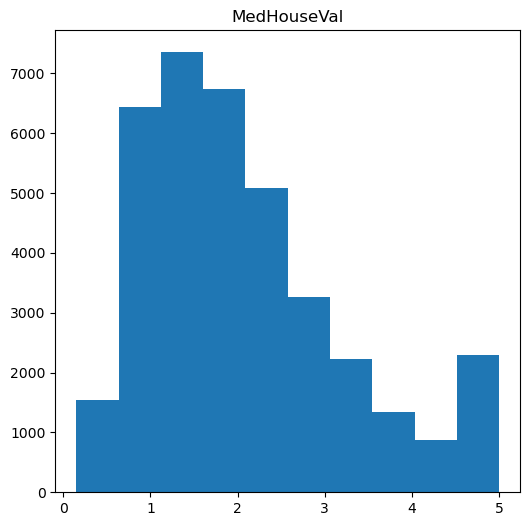

In [7]:
# Create subplots

fig = plt.figure(figsize=(6, 6))

#plt.subplot(121)
plt.hist(df_train['MedHouseVal'])
plt.title("MedHouseVal")

* **Kind of an interesting distibution for the target variable; appears close to being skewed right, while also close to being a normal distribution (outside of the number of houses at the higher end of prices being relatively plentiful).**

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

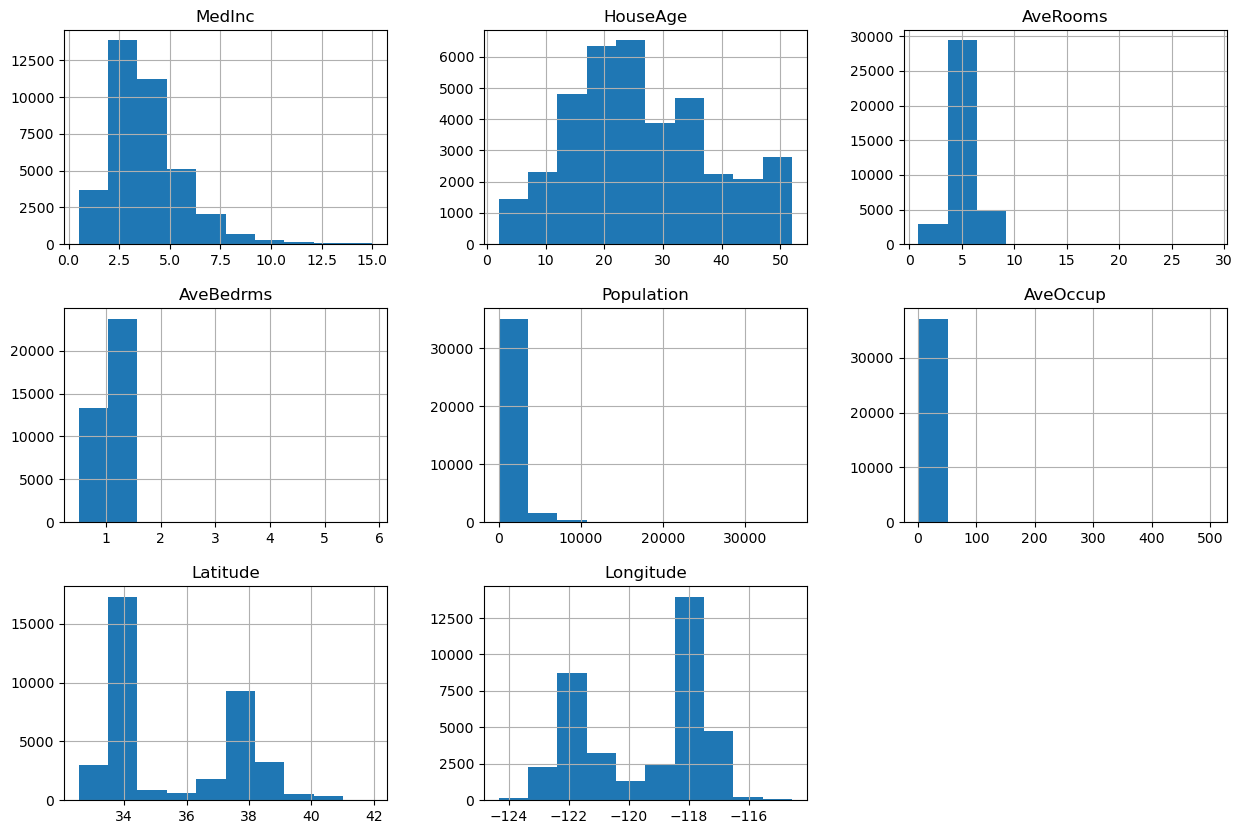

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
df_train.hist(column=[column for column in df_train.columns if column != 'MedHouseVal'], ax=ax)

* MedInc, HouseAge, AveRooms have fairly normal distributions, but HouseAge is the most normally distributed of these and all; MedInc, AveRooms, AveBedrms, Population, and AveOccup are highly skewed right, while Latitude and Longitude have show bimodality in addition to being less skewed.

<AxesSubplot:>

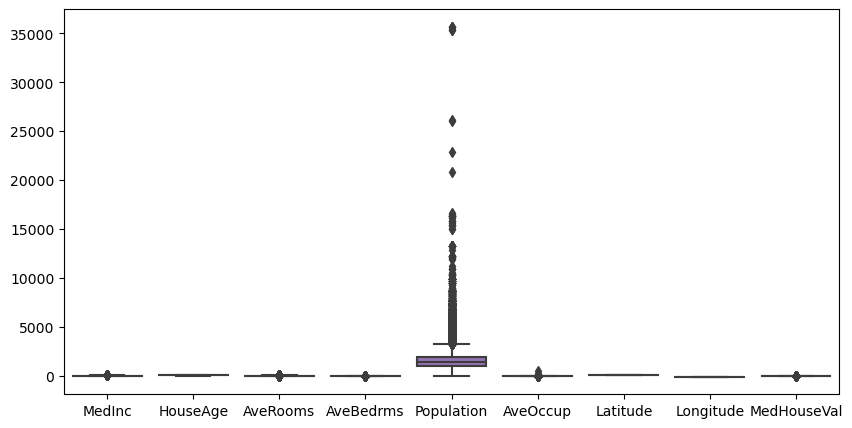

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(df_train)

* **All variables except HouseAge, Latitude, and Longitude have outliers.**

<AxesSubplot:>

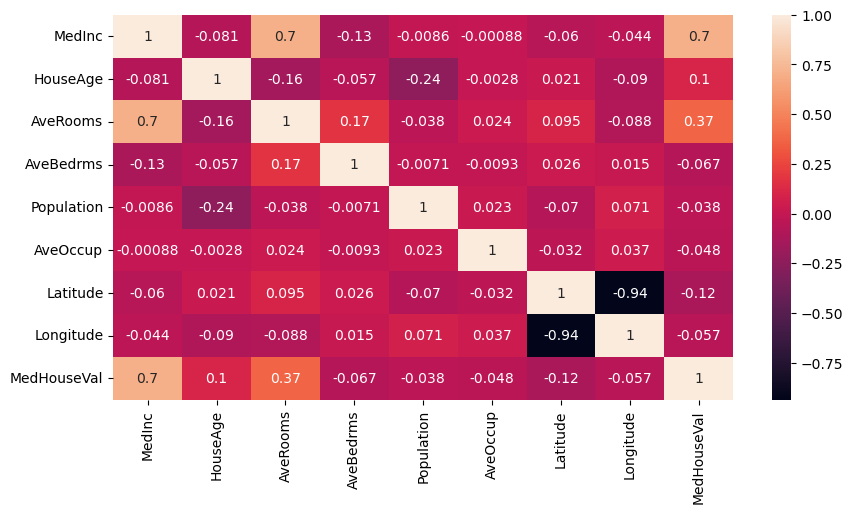

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(method='pearson'), annot=True)

* **Extremely strong negative correlation between Latitude and Longitude.**

* **Very strong positve correlation with MedInc and AveRooms (though not strong between MedInc and AveBedrms), and another strong positive correlation with MedInc and the target variable (MedHouseVal).**

* **Solid positive correlation between AveRooms and MedHouseVal.**

* Other relationships that are interesting:

    * HouseAge and Population have a material negative correlation (older the house, the lower the population), and a material negative correlation between HouseAge and AveRooms (older the house, the less rooms). But there is a positive correlation between HouseAge and the target variable MedHouseVal (older the house, the higher the price). there is a negative correlation between HouseAge and MedInc.
    
    * MedInc has, as previously mentioned, a very strong positive correlation with AveRooms, but an actually moderate negative correlation with AveBedrms. Interestingly, this is while AveRooms and AveBedrms are positively correlated.
    
    * MedHouseVal is more sensitive to Latitude than Longitude. It is also more sensitive to AveRooms than AveBedrms (negatively correlated to AveBedrms, but positively correlated to AveRooms).

<Figure size 1000x500 with 0 Axes>

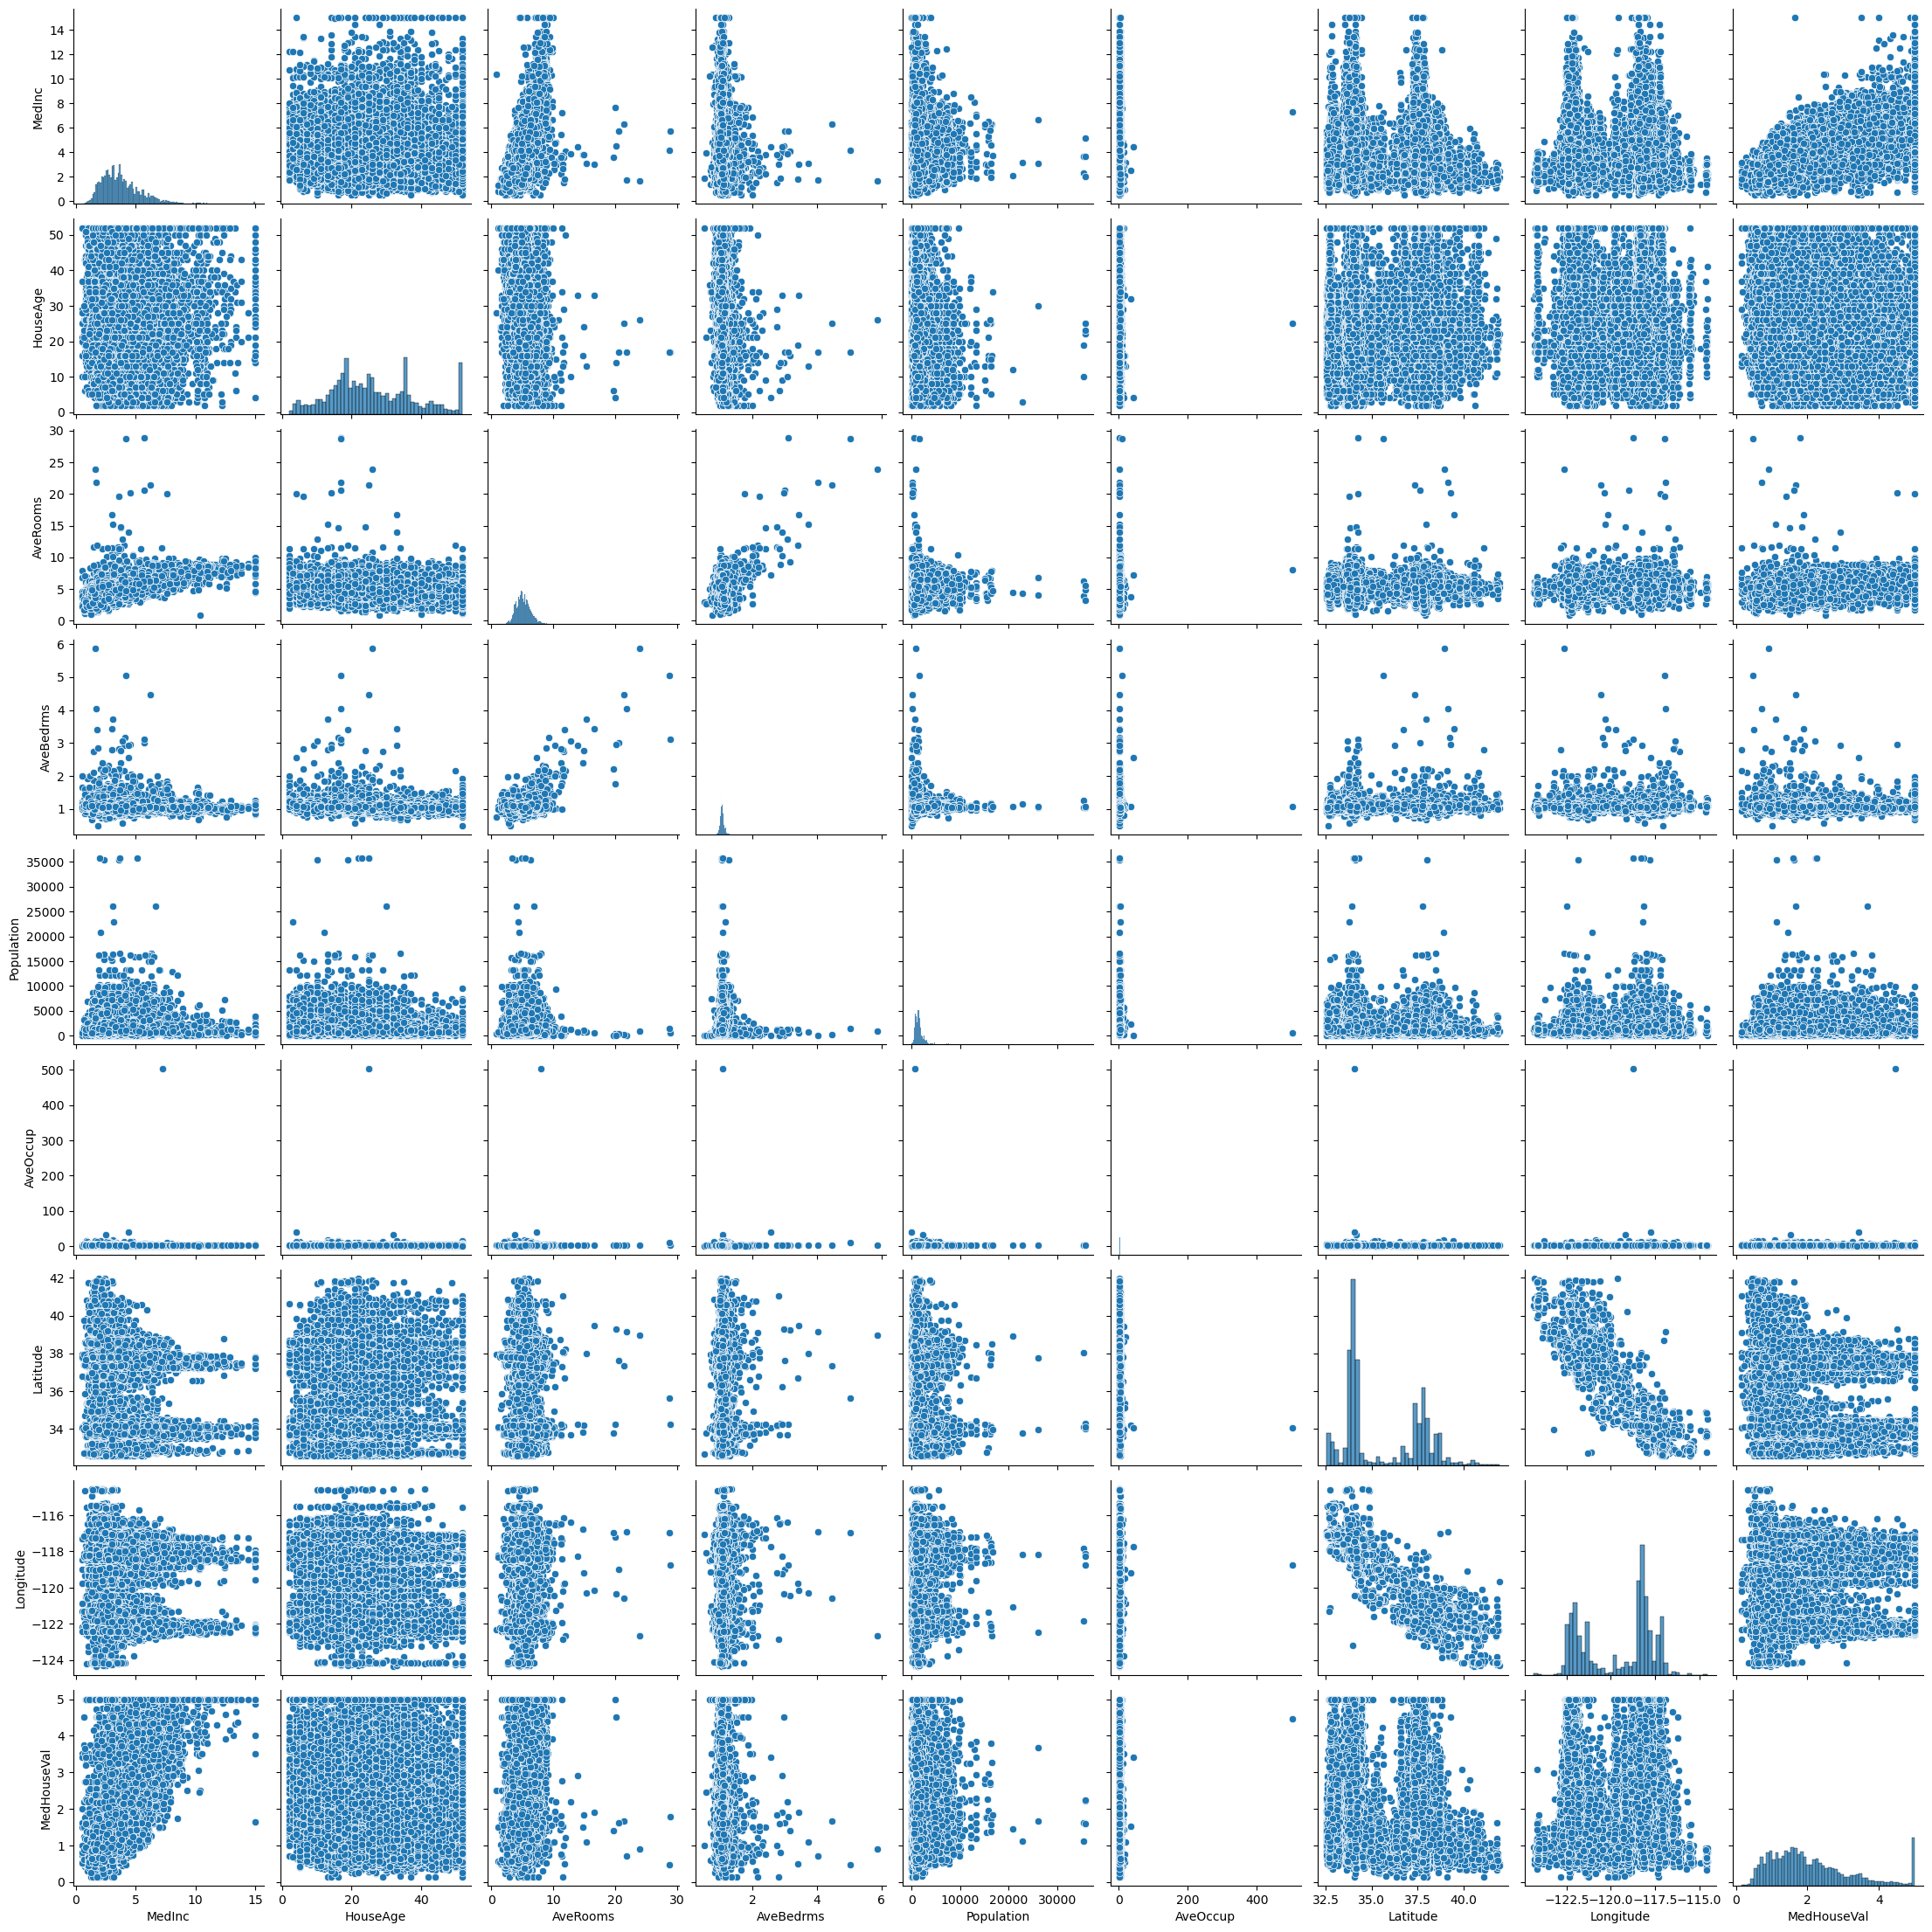

In [11]:
plt.figure(figsize=(10,5))
sns.pairplot(df_train)

* The Latitude and Longitude correlations are very obvious.

* It is confusing, when looking at this pairplot, to see the strong appearance of correlation between AveRooms and AveBedrms, but for it to be such a low correlation in the heatmap. Conversely, the relationship between MedInc and AveRooms, though obviously positive, does not appear as strong in the pairplot as the heatmap. In fact, a lot of the correlations illustrated by the heatmap do not obviously appear when the pairplot is implemented.

## 5. Test Linearity Assumptions

The Linear Regression model should be validated for all model assumptions including the definition of the functional form. If the assumptions are violated, we need to revisit the model.

**Assumption 1**

The functional form of regression is correctly specified i.e. there exists a linear relationship between the coefficient of the parameters (independent variables) and the dependent variable Y.

**Assumption 2**

The residuals are normally distributed.

**Assumption 3**

The variance of the residuals is constant across all values of the independent variable X. (also known as ‘Homoscedasticity’).

**Assumption 4**

There is no (low) correlation between independent variables (also known as ‘Multi Collinearity’).

**Assumption 5**

There is no autocorrelation between errors.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#708090;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> Assumption 1: Linear Relationship </b>
</p>

</div>


The linear regression algorithm assumes that there is a linear relationship between the parameters of independent variables and the dependent variable Y. If the true relationship is not linear, we cannot use the model as the accuracy will be significantly reduced.

Simple scatterplots of the model's independent and dependent variable(s) should allow on to gauge overally linearity.

<Figure size 1000x1000 with 0 Axes>

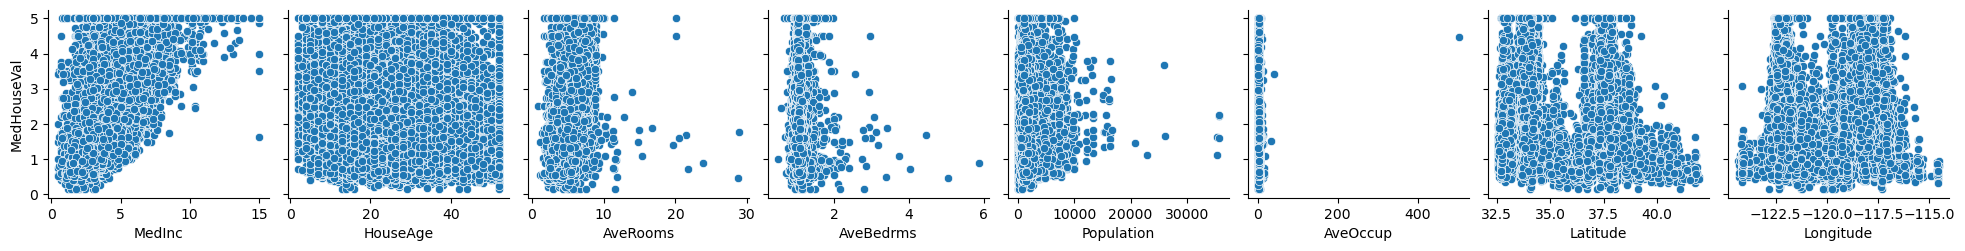

In [12]:
plt.figure(figsize=(10,10))
sns.pairplot(df_train, x_vars = df_train[[column for column in df_train.columns \
                                                        if column != 'MedHouseVal']], y_vars='MedHouseVal')

* The most obvious is MedInc, which the target variable has a linear relationship with; after that, no other variable has a clear linear relationship (although AveRooms has a high correlation).

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#708090;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> Assumption 2: Normal Distribution of Residuals </b>
</p>

</div>



This assumption states that the residuals from the model is normally distributed.

After determining the model parameters, it is good to check the distribution of the residuals, which can be done in a seaborn distplot. Apart from the visual of the distribution, **one should check the Q-Q plot for better understanding of the distribution.** 

* The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our residuals are normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat  subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

x = df_train.drop(["MedHouseVal"],axis=1) #, 'Longitude', 'AveBedrms', 'MedInc'
y = df_train.MedHouseVal

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y,random_state = 0,test_size=0.25)

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 6.261000941054279e-15


* **The assumption is that the mean of the residuals is close to zero, so this is good. Let's look at an illustration:**

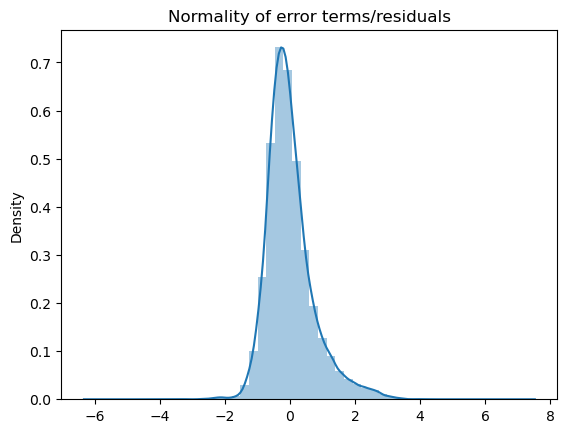

In [14]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

* The residuals appear fairly normally distributed, if skewed only subtly to the right.

* Below, let's illustrate a qqplot of the residuals.

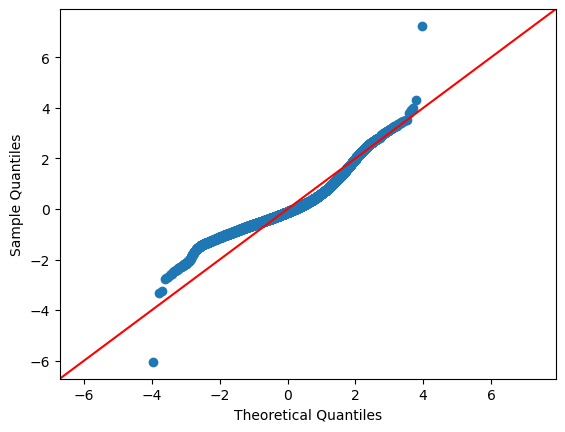

In [15]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(residuals, line='45')
plt.show()

* **Notice the points fall along a line in the middle of the graph, but curve off in the extremities. Normal Q-Q plots that exhibit this behavior usually mean the data have more extreme values than would be expected if they truly came from a Normal distribution.**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#708090;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> Assumption 3: Constant Variance of Residuals (Homoscedasticity) </b>
</p>

</div>

The assumption of homoscedasticity (homo — equal , scedasticity — spread) states that the y population corresponding to various X values have the same variance i.e. it neither increases nor decreases as X increases.

Heteroscedasticity is when the variance is unequal i.e. the variance of y population varies with X.

****

**One way to determine if heteroscedasticity is present in a regression analysis is to use a Breusch-Pagan Test.**
The test uses the following null and alternative hypotheses:

* **Null Hypothesis (H0)**: Homoscedasticity is present (the residuals are distributed with equal variance)
* **Alternative Hypothesis (HA)**: Heteroscedasticity is present (the residuals are not distributed with equal variance)

If the p-value of the test is less than some significance level (i.e. α = .05) then we reject the null hypothesis and conclude that heteroscedasticity is present in the regression model.

****

We use the following steps to perform a Breusch-Pagan test:

1. Fit the regression model.
2. Calculate the squared residuals of the model.
3. Fit a new regression model, using the squared residuals as the response values.
4. Calculate the Chi-Square test statistic X2 as **n*R2new** where:

* **n**: The total number of observations

* **R2new**: The R-squared of the new regression model that used the squared residuals as the response values

If the p-value that corresponds to this Chi-Square test statistic with p (the number of predictors) degrees of freedom is less than some significance level (i.e. α = .05) then reject the null hypothesis and conclude that heteroscedasticity is present.

In [16]:
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


#fit multiple linear regression model
model = smf.ols('MedHouseVal ~  HouseAge + AveRooms  + Population + AveOccup + Latitude + MedInc + AveBedrms + Longitude', \
            data=df_train).fit() #MedInc + + AveBedrms + Longitude
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
print(lzip(names, test))

[('Lagrange multiplier statistic', 5875.427923265769), ('p-value', 0.0), ('f-value', 872.2485524702697), ('f p-value', 0.0)]


* Typically, **if the p value is less than 0.05, we reject the Null Hypothesis.** Thus, we reject the Null Hypothesis that error variances are equal (not great).

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#708090;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> Assumption 4: Low Correlation between Independent Variables (Low Multicollinearity) </b>
</p>

</div>



Multicollinearity occurs in multiple regression model where two or more explanatory variables are closely related to each other.

This can pose a problem since it is difficult to separate out the individual effects of the correlated variables on the response variable i.e. determine how each variable is separately associated with the response variable.

****

**Multicollinearity is usually measured by calculating Variance Inflation Factor or VIF**. The larger the value of VIF, the more correlated the variable is with other regressors. VIF shows how much the variance of a variable is inflated due to presence of multicollinearity. As the extent of collinearity increases, VIF also increases. If there is no collinearity between two variables, VIF will be 1.

<div style="width:50%;text-align: center;"><img align=middle src= "https://miro.medium.com/v2/resize:fit:624/format:webp/1*kXpK27JR1xPw-SpFFdtAEw.png" alt ="VIF" style='width: 150px;'></div>

It is calculated by taking a predictor and regressing it against every other predictor in the model. This gives the R² value which is then used in the VIF formula. Usually a variable with VIF greater than 10 is considered to be troublesome.


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

      feature         VIF
0      MedInc   13.465519
1    HouseAge    6.176803
2    AveRooms   47.634374
3   AveBedrms  144.844763
4  Population    2.812619
5    AveOccup    2.105333
6    Latitude  591.176606
7   Longitude  849.471631


* Typically, a VIF above 5 begins to signal multicollinearity which should be examined further. In that case, **essentially all variables but Population and AveOccup are suspect, with AveRooms/AveBedrms and Latitude/Longitude being the most egregious.** HouseAge and MedInc are closer to manageable.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#708090;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> Assumption 5: No Autocorrelation between Errors </b>
</p>

</div>


Linear regression model assumes that error terms are independent. This means that the error term of one observation is not influenced by the error term of another observation. In case it is not so, it is termed as autocorrelation.

It is generally observed in time series data. Time series data consists of observations for which data is collected at discrete points in time. Usually, observations at adjacent time intervals will have correlated errors.

****

**The Durbin Watson test is typically used to check for autocorrelation.** The test uses the following null and alternative hypotheses:

* **Null Hypothesis Ho** : There is no autocorrelation of errors

* **Alternate Hypothesis Ha** : There is autocorrelation of errors

Durbin Watson statistic checks for the presence of autocorrelation in lag 1 of the residuals. The statistic is given as follows:

<div style="width:50%;text-align: center;"><img align=middle src= "https://miro.medium.com/v2/resize:fit:720/format:webp/1*21iFRZloy9iA0McHHHuaBA.png" alt ="Durbin-Watson Test Statistic" style='width: 150px;'></div>


The value of the statistic will lie between 0 to 4. **A value between 1.8 and 2.2 indicates no autocorrelation. A value less than 1.8 indicates positive autocorrelation and a value greater than 2.2 indicates negative autocorrelation.**

In [18]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

#fit multiple linear regression model
model = ols('MedHouseVal ~  HouseAge + AveRooms  + Population + AveOccup + Latitude + MedInc + AveBedrms + Longitude', \
            data=df_train).fit() #MedInc + + AveBedrms + Longitude
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     7080.
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        18:01:13   Log-Likelihood:                -40958.
No. Observations:               37137   AIC:                         8.193e+04
Df Residuals:                   37128   BIC:                         8.201e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.0396      0.543    -66.419      0.0

* Durbin-Watson test statistic of 1.990 suggests no autocorrelation, as expected.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#708090;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> Findings - Assumption Tests </b>
</p>

</div>

* Non-linear relationship between target variable and most of the input variables.

* Normally distributed residuals, although there are a material amount of extremes.

* Heteroscedasticity appears to be present.

* There is signficant multicollinearity with multiple input variables.

* No autocorrelation.

## 6. Data Preprocessing

Because of the strange nonnormal distributions of some of the inputs as well as the target variable, we will use log transform to create more normality of distribution, and also scale with MinMaxScaler.

In [19]:
df_train = df_train.apply(lambda x: np.log(x) if x.name in \
               ['MedHouseVal', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'MedInc', 'AveBedrms'] \
               else x)

df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.869576,2.708050,1.342123,0.106250,7.154615,0.911073,3.543854,-120.12,-0.020203
1,1.313401,2.833213,1.793986,0.052798,7.315884,1.338438,3.655581,-121.22,-0.055513
2,1.563394,3.295837,1.877265,0.098192,6.966967,0.902030,3.547028,-120.45,0.454890
3,0.881202,2.772589,1.209021,-0.035180,7.134891,0.736822,3.486151,-117.09,0.289680
4,1.321756,3.951244,1.454981,0.066954,7.491645,0.472993,3.632309,-122.41,1.504077


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# define standard scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(df_train)
df_train = pd.DataFrame(scaled, columns=df_train.columns)

df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.459494,0.618430,0.426742,0.324491,0.645369,0.153442,0.240741,0.431633,0.535268
1,0.589976,0.656846,0.555005,0.302794,0.662554,0.221582,0.681132,0.319388,0.525198
2,0.663473,0.798837,0.578644,0.321220,0.625372,0.152000,0.253253,0.397959,0.670752
3,0.462912,0.638238,0.388961,0.267082,0.643267,0.125659,0.013298,0.740816,0.623638
4,0.592433,1.000000,0.458778,0.308540,0.681285,0.083593,0.589401,0.197959,0.969953


In [21]:
x = df_train.drop(["MedHouseVal"],axis=1) #, 'Longitude', 'AveBedrms', 'MedInc'
y = df_train.MedHouseVal

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y,random_state = 0,test_size=0.25)

## 7. Test Algorithms

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7A. Linear Regressions </b>
</p>

</div>

<div class="alert alert-block alert-info">
<b> Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events.</b>
</div>

**7A1. Linear Regression**

From https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable. The input variables are assumed to have a Gaussian distribution. Another assumption is that the predictors are not highly correlated with each other (a problem called multi-collinearity).

The linear regression equation can be expressed in the following form:

***y = a1x1 + a2x2 + a3x3 + ..... + anxn + b***

Where the following is true:

* y is the target variable.
* x1, x2, x3,...xn are the features.
* a1, a2, a3,..., an are the coefficients.
* b is the parameter of the model.

The parameters a and b of the model are selected through the Ordinary least squares (OLS) method. It works by minimizing the sum of squares of residuals (actual value - predicted value).


**7A2. Polynomial Regression**

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x)

Why Polynomial Regression: 
 
* There are some relationships that a researcher will hypothesize is curvilinear. Clearly, such types of cases will include a polynomial term.
* Inspection of residuals. If we try to fit a linear model to curved data, a scatter plot of residuals (Y-axis) on the predictor (X-axis) will have patches of many positive residuals in the middle. Hence in such a situation, it is not appropriate.
* An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7B. Linear Regressions - Regularized </b>
</p>

</div>

<div class="alert alert-block alert-info">
<b>In the Regularization technique, we reduce the magnitude of the independent variables by keeping the same number of variables. Regularization works by adding a penalty or complexity term or shrinkage term with Residual Sum of Squares (RSS) to the complex model.</b>
</div>

**7B1. Ridge Regression**

From https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn:

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

***Loss function = OLS + alpha * summation (squared coefficient values)***

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

**7B2. LASSO Regression**

From https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

***Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)***

In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

**7B3. Elastic Net Regression**

From https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn:

ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7C. Linear Regressions - Bayesian </b>
</p>
</div>

<div class="alert alert-block alert-info">
<b>The goal of Bayesian Linear Regression is to ascertain the prior probability for the model parameters rather than to identify the one "best" value of the model parameters; where with normal linear regression, you only get a confidence interval and a point estimate, with this Bayesian processing, you get the full range of inferential solutions.</b>
</div>

**7C1. Bayesian Ridge Regression**

From https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression

BayesianRidge estimates a probabilistic model of the regression problem as described above. The prior for the coefficient  is given by a spherical Gaussian.

The priors are chosen to be gamma distributions, the conjugate prior for the precision of the Gaussian. The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge.

The parameters are estimated jointly during the fit of the model, the regularization parameters  and  being estimated by maximizing the log marginal likelihood. The scikit-learn implementation is based on the algorithm described in Appendix A of (Tipping, 2001) where the update of the parameters  and  is done as suggested in (MacKay, 1992). The initial value of the maximization procedure can be set with the hyperparameters alpha_init and lambda_init.

There are four more hyperparameters that are usually chosen to be non-informative.

**7C2. ARD Regression**

From https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression

The Automatic Relevance Determination (as being implemented in ARDRegression) is a kind of linear model which is very similar to the Bayesian Ridge Regression, but that leads to sparser coefficients.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7D. Support Vector Machines - Regression </b>
</p>

</div>

<div class="alert alert-block alert-info">
<b>Support Vector Machines (SVM) are popularly and widely used for classification problems in machine learning that tries to find a line/hyperplane (in multidimensional space) that separates classes from each other. Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems; instead of separating classes, the line/hyperplane is a line of best fit between different points that are within a certain "decision boundary" (or have an absolute error rate within a certain specified limit).</b>
</div>

**7D1. SVR**

From https://www.listendata.com/2018/03/regression-analysis.html#id-61dea6:

Support vector regression can solve both linear and non-linear models. SVM uses non-linear kernel functions (such as polynomial) to find the optimal solution for non-linear models.

The main idea of SVR is to minimize error, individualizing the hyperplane which maximizes the margin.Support vector regression can solve both linear and non-linear models.


**7D2. Linear Support Vector Regression**

From https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html

Similar to SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input.

**7D3. Nu Support Vector Regression.**

From https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html

Similar to NuSVC, for regression, uses a parameter nu to control the number of support vectors. However, unlike NuSVC, where nu replaces C, here nu replaces the parameter epsilon of epsilon-SVR.

The implementation is based on libsvm.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7E. Decision Tree Regression </b>
</p>
</div>

<div class="alert alert-block alert-info">
<b>Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.</b>
</div>

**7E1. Decision Tree Regressor**

From https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/:

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">
<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7F. Ensemble Learning Methods </b>
</p>

</div>

<div class="alert alert-block alert-info">
<b>Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways, such as stacking (using out-of-fold predictions made during k-fold cross-validation from multiple models to build a new model), blending (same as stacking but predictions only made on validating/holdout data, as opposed to out-of-fold during k-fold cross validation), bagging (combining the results of multiple models (for instance, all decision trees) to get a generalized result), and boosting (a sequential process, where each subsequent model attempts to correct the errors of the previous model). There are also simple ensemble learning methods such as max voting, averaging, and weighted averaging.</b>
</div> 

**7F1. Gradient Boosting Regressor**

From https://www.numpyninja.com/post/gradient-boost-for-regression-explained

Gradient boost is a  machine learning algorithm which works on the ensemble technique called 'Boosting'.  Like other boosting models, Gradient boost sequentially combines many weak learners to form a strong learner. Typically Gradient boost uses decision trees as weak learners. 

**7F2. Random Forest Regression**

From https://www.geeksforgeeks.org/random-forest-regression-in-python/:

Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

**7F3. Stacking Regression**

From https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/:

Stacked Generalization or “Stacking” for short is an ensemble machine learning algorithm that involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.

**7F4. Blending Regression**

From https://machinelearningmastery.com/blending-ensemble-machine-learning-with-python/:

Blending is a colloquial name for stacked generalization or stacking ensemble where instead of fitting the meta-model on out-of-fold predictions made by the base model, it is fit on predictions made on a holdout dataset.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7G. Least Squares Regression </b>
</p>
</div>

<div class="alert alert-block alert-info">
<b>A least-squares regression method is a form of regression analysis that establishes the relationship between the dependent and independent variables along a linear line. This line refers to the “line of best fit.” The least-squares method provides the closest relationship between the dependent and independent variables by minimizing the distance between the residuals, and the line of best fit, i.e., the sum of squares of residuals is minimal under this approach. Hence, the term “least squares.”</b>
</div> 

**7G1. Ordinary Least Squares Regression**

From https://www.statology.org/ols-regression-python/:

Ordinary least squares (OLS) regression is a method that allows us to find a line that best describes the relationship between one or more predictor variables and a response variable.

This method allows us to find the following equation:

***ŷ = b0 + b1x***

where:

ŷ: The estimated response value
b0: The intercept of the regression line
b1: The slope of the regression line

This equation can help us understand the relationship between the predictor and response variable, and it can be used to predict the value of a response variable given the value of the predictor variable.

**7G2. Weighted Least Squares Regression**

From https://www.statology.org/weighted-least-squares-in-python/:

One of the key assumptions of linear regression is that the residuals are distributed with equal variance at each level of the predictor variable. This assumption is known as homoscedasticity.

When this assumption is violated, we say that heteroscedasticity is present in the residuals. When this occurs, the results of the regression become unreliable.

One way to handle this issue is to instead use weighted least squares regression, which places weights on the observations such that those with small error variance are given more weight since they contain more information compared to observations with larger error variance.

**7G3. Partial Least Squares (PLS) Regression**

From https://support.minitab.com/en-us/minitab/20/help-and-how-to/statistical-modeling/regression/supporting-topics/partial-least-squares-regression/what-is-partial-least-squares-regression/

Partial least squares (PLS) regression is a technique that generalizes and combines features from principal component analysis and multiple regression, and reduces the predictors to a smaller set of uncorrelated components and performs least squares regression on these components, instead of on the original data. 

PLS regression is especially useful when:
* your predictors are highly collinear, or when 
* you have more predictors than observations and ordinary least-squares regression either produces coefficients with high standard errors or fails completely. 

PLS does not assume that the predictors are fixed, unlike multiple regression. This means that the predictors can be measured with error, making PLS more robust to measurement uncertainty.

**7G3. Quantile Regression**

From https://www.ibm.com/docs/en/spss-statistics/saas?topic=regression-quantile:

Quantile regression models the relationship between a set of predictor (independent) variables and specific percentiles (or "quantiles") of a target (dependent) variable, most often the median. It has two main advantages over Ordinary Least Squares regression:

* Quantile regression makes no assumptions about the distribution of the target variable.
* Quantile regression tends to resist the influence of outlying observations (outliers).

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7H. Dimensionality Reduction </b>
</p>

</div>

<div class="alert alert-block alert-info">
<b>Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. Perhaps the most common are so-called feature selection techniques that use scoring or statistical methods to select which features to keep and which features to delete; matrix factorization methods can also be used to reduce a dataset matrix into its constituent parts, the most common matrix factorization method being principal components analysis, or PCA for short; and there are stepwise regressions, in which less important predictor variables are successively removed in an automatic iterative process.</b>

**7H1. Stepwise Regression**

From https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html and https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html

Transformer that performs Sequential Feature Selection.

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. 

**7H2. Principal Component Analysis (PCA)**

From https://www.jcchouinard.com/pca-with-python/#What_is_Principal_Component_Analysis_PCA:

PCA, or Principal component analysis, is the main linear algorithm for dimension reduction often used in unsupervised learning.

This algorithm identifies and discards features that are less useful to make a valid approximation on a dataset.

By reducing the number of features, PCA can help:

* Reduce the risk of overfitting a model to noisy features.
* Speed-up the training of a machine learning algorithm.
* Make simpler data vizualisations.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> 7I. Robust Regressions </b>
</p>

</div>

<div class="alert alert-block alert-info">
<b>Simple linear regression aims to find the best fit line that describes the linear relationship between some input variables(denoted by X) and the target variable(denoted by y). This has some limitations as in real-world problems, there is a high probability that the dataset may have outliers. This results in biased model fitting. To overcome this limitation of the biased fitted model, robust regression was introduced.</b>

**7I1. RANSAC Regressor**

From https://www.geeksforgeeks.org/robust-regression-for-machine-learning-in-python/:

In this model first data is separated into inliers and outliers then the model is trained on the inlier’s data. Training model in this way helps the model to learn patterns instead of any noises.

**7I2.Theil Sen Regressor**

From https://www.geeksforgeeks.org/robust-regression-for-machine-learning-in-python/:

This model is somehow similar to the random forest model in which we train multiple decision trees and average their results. This helps us to eliminate the problem of overfitting. This model also trains multiple regression models on the subsets of the training data and then the coefficients of those models are combined. This averaging step of the coefficient is exactly the step where the model becomes robust to the outliers.

**7I3. Huber Regressor**

From https://www.geeksforgeeks.org/robust-regression-for-machine-learning-in-python/:

In this model, weights are optimized by giving higher preferences to the data points which are inliers. This again helps to learn the patterns specifically instead of the noise present in the data.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682b4;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center;">

<p style="padding: 10px;
              color:white;
              text-align: center;">
    <b> Final Scores - Algorithms </b>
</p>

</div>

In [128]:
#define function for conditional formatting
'''def highlight_cells_1(val):
    color = 'lightgray' if val > 0.676580 and val < 0.770133 else ''
    return 'background-color: {}'.format(color)
def highlight_cells_2(val):
    color = 'lightgray' if val < 0.071498 and val > 0.059095 else ''
    return 'background-color: {}'.format(color)
def highlight_cells_3(val):
    color = 'lightgray' if val < 0.093531 and val > 0.079004 else ''
    return 'background-color: {}'.format(color)'''

merged_df = pd.concat([linear_regression_df, regularization_regression_df, bayesian_regression_df, svm_regression_df,
                       dtree_regression_df, ensemble_regression_df, ls_regression_df, redux_regression_df, robust_regression_df])
merged_df.reset_index(drop=True).style.\
highlight_max(color = 'lightgreen', subset = ['Accuracy', 'R Squared'], axis=0).\
highlight_min(color = 'lightgreen', subset = ['Mean Absolute Error', 'Root Mean Squared Error'], axis = 0)#.\
#applymap(highlight_cells_1, subset=['Accuracy', 'R Squared']).\
#applymap(highlight_cells_2, subset=['Mean Absolute Error']).\
#applymap(highlight_cells_3, subset=['Root Mean Squared Error'])

,Algorithm,Accuracy,R Squared,Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,0.676580,0.676580,0.071498,0.093531
1,Polynomial Regression,0.718254,0.718254,0.065996,0.087297
2,Ridge Regression,0.676447,0.676447,0.071538,0.093550
3,LASSO Regression,-0.000135,-0.000135,0.133249,0.164476
4,Elastic Net Regression,-0.000135,-0.000135,0.133249,0.164476
5,Bayesian Ridge Regression,0.676576,0.676576,0.071499,0.093532
6,ARD Regression,0.676521,0.676521,0.071508,0.093540
7,SVR,0.735002,0.735002,0.064299,0.084663
8,LinearSVR,0.675707,0.675707,0.071403,0.093657
9,NuSVR,0.738183,0.738183,0.063597,0.084153


* **Takeaways:**

    * *Blending regression/Random Forest Regression are the best performers depicted in the table, and for that reason is depicted in green); off the table, in statsmodel, the weighted least squares notably recorded a 0.98 r-squared metric during training.*
    
    * *The models that performed better than linear regression in the subject metric within the column*.
    
        * Gradient Boosting, Random Forest, Stacking. Ensemble methods work by removing variance and adding bias.
        
        * NuSVR and SVR. SVR, instead of fitting a line of best fit on all data, fits a line based on a threshold of values...as SVR allows for non-linear datasets as well, this makes the case a nonlinear model works better than linear.
        
        * Polynomial. Performs better than linear; adding interaction terms actually gives a better result than not.
        
        * Forward/Backward Selection (Stepwise). Removing a variable as chosen by the algorithm slightly improves on linear regression; interesting in that completely leaving any variable out before the training did not improve upon training.
        
    * *Algorithms that didn't perform better than the linear regression in the subject metric within the column.*
    
        * Ridge, LASSO, Elastic Net (Regularization). The worst performers, as they perform way worse than linear regression (Ridge was about as good as linear regression); meaning the shrinking of coefficients isn't ideal for one reason or another. 
        
        * Bayesian Ridge, ARD (Bayesian). Bayesian linear regressions perform as well as a general linear regression, meaning probability distributions are not more helpful than chosen coefficients that are given to variables after training. 
        
        * Linear SVR. Performs about as well as linear regression; further makes the case a linear fit is inferior to a nonlinear fit.
        
        * Decision Tree. Performs worse than linear regression; possibly means variations in data, non-continuous approximations or otherwise may be harmful in relation to this dataset.
        
        * PCA. Performed as well as linear regression (ignore accuracy figure, is actually 0.67); best result is using number of variables available (8) instead of less, illustrating removing a variable may not be necessary (as did a manual attempt).
        
        * Ransac, Theil Sen, Huber (Robust). Performed about as well as linear regression; primarily shows outliers likely aren't a significant hindrance to the dataset.
        
        * Partial Least Squares, Ordinary Least Squares, Quantile (Least Squares). Immaterially better performance than linear regression (Partial, Ordinary), both right about in line (0.67 r-squared). Quantile had a much worse r-squared at 0.45, which does illustrate that outliers may have a large impact on the dataset.
        
**The clearest thing from analysis up to this point is we smehow may be dealing with more of a nonlinear issue. It's unclear based on the performance of different models whether outliers have an impact, and whether removing a variable is necessary or not.**